# 1 - Generative Models, Naive Bayes Classifier

a)

b)

c)

d)

# 2 - Kernels

a)

b)

c)

# 3 - PCA and Eigenface

a)

C:\Users\Riley\AppData\Local\Temp\ipykernel_37360\3343553924.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  faces = pd.read_csv('faces.dat', sep='   ', header=None)


(400, 4096)


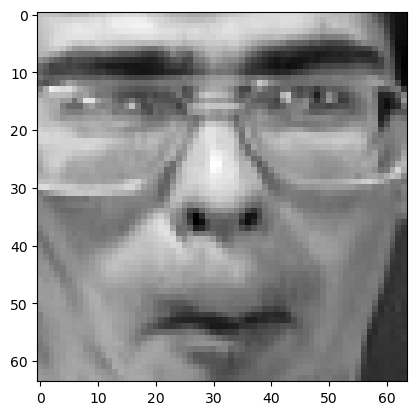

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Display 200th image of faces.dat (200th row of faces.dat), where each column is a pixel and it is a 64x64 image
def display_face(data, row):
    plt.imshow(data[row - 1].reshape(64, 64).T, cmap='gray')
    plt.show()

faces = pd.read_csv('faces.dat', sep='   ', header=None)
print(faces.shape)
display_face(faces.values, 200)

# Reshape 4096 columns into 64x64 image
facesDisplay = faces.values.reshape(-1, 64, 64)

b)

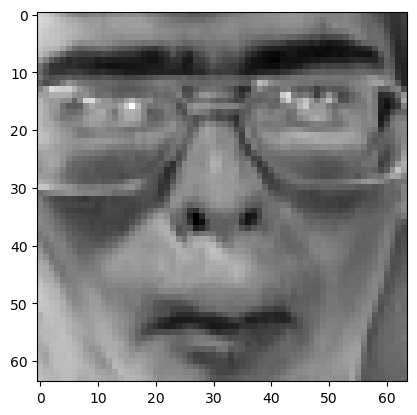

In [76]:
# Remove the mean of the images and display the 200th image again
mean_face = faces.mean()
faces_centered = faces - mean_face
display_face(faces_centered.values, 200)

c)

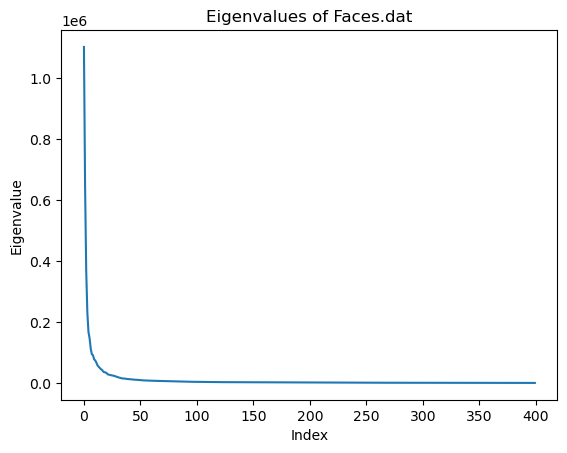

Largest Eigenvalue: 1.1034e+06
Last Eigenvalue: -2.7923e-10


In [87]:
# Calculate the covariance matrix
cov_matrix = np.cov(faces_centered.T)

# Calculate the eigenvalues and eigenvectors (400)
e_values, e_vectors = np.linalg.eigh(cov_matrix)

# Sort eigenvalues and their eigenvectors in descending order
idx = e_values.argsort()[::-1]
e_values = e_values[idx]
e_values_400 = e_values[:400]

# Plot the eigenvalues on scale of 0 to 400
plt.plot(e_values_400)
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of Faces.dat')
plt.show()

# Largest eigenvalue
print(f'Largest Eigenvalue: {e_values[0]:.4e}')

# Last eigenvalue (400th)
print(f'Last Eigenvalue: {e_values[-1]:.4e}')

d)

This suggests that there is a linear combination of variables that results in a constant value. This implies that there are redundant dimensions among the many features in the data. This also explains why we can target the largest eigenvalues for reconstruction of images, shown below in part g.

e)

In [78]:
# Determine dimensionality of data you want to keep based on the eigenvalues
# 95% of the variance
variance = 0.95
total_variance = np.sum(e_values)
cumulative_variance = np.cumsum(e_values)
dimensionality = np.argmax(cumulative_variance / total_variance > variance) + 1
print(f'Dimensionality: {dimensionality}')

Dimensionality: 123


f)

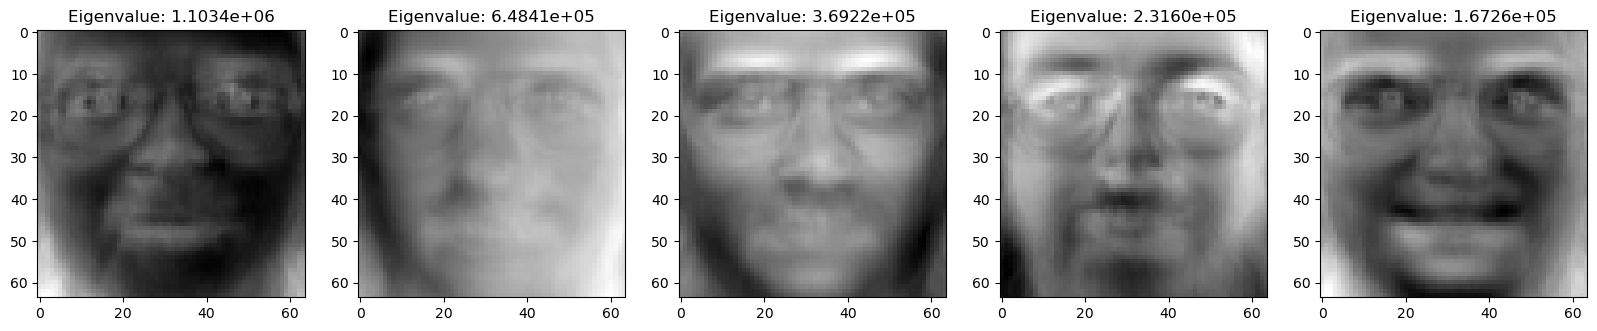

In [79]:
# Display top 5 leading eigenvectors and their top 5 largest eigenvalues in 5 figures
fig, axs = plt.subplots(1, 5, figsize=(20, 20))
for i in range(5):
    axs[i].imshow(e_vectors[:, idx[i]].reshape(64, 64).T, cmap='gray')
    axs[i].set_title(f'Eigenvalue: {e_values[i]:.4e}')
plt.show()

g)

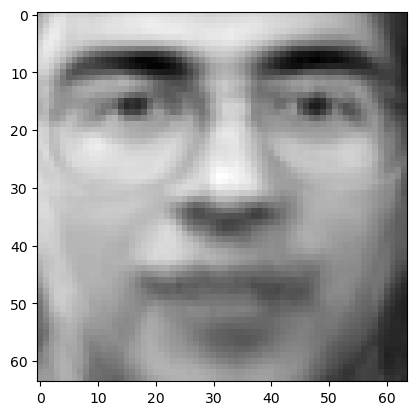

In [80]:
# Display 200th image using 10 principal components
e_vectors_10 = e_vectors[:, idx[:10]]
faces_10 = faces_centered @ e_vectors_10
faces_reconstructed = faces_10 @ e_vectors_10.T + mean_face
display_face(faces_reconstructed.values, 200)

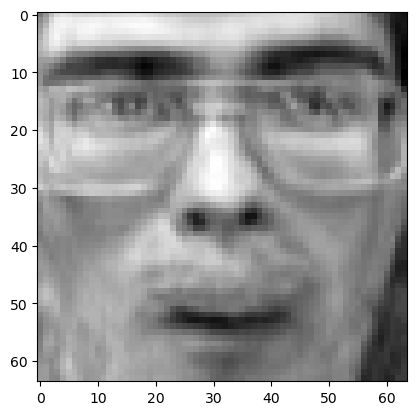

In [81]:
# Display 200th image using 100 principal components
e_vectors_100 = e_vectors[:, idx[:100]]
faces_100 = faces_centered @ e_vectors_100
faces_reconstructed = faces_100 @ e_vectors_100.T + mean_face
display_face(faces_reconstructed.values, 200)

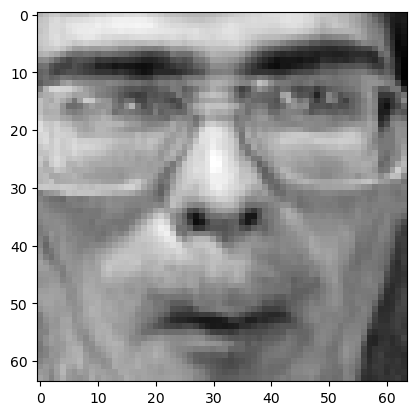

In [82]:
# Display 200th image using 200 principal components
e_vectors_200 = e_vectors[:, idx[:200]]
faces_200 = faces_centered @ e_vectors_200
faces_reconstructed = faces_200 @ e_vectors_200.T + mean_face
display_face(faces_reconstructed.values, 200)

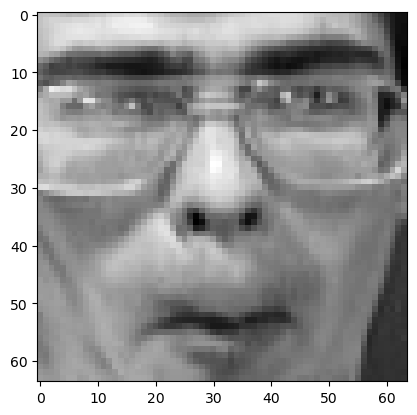

In [83]:
# Display 200th image using 399 principal components
e_vectors_399 = e_vectors[:, idx[:399]]
faces_399 = faces_centered @ e_vectors_399
faces_reconstructed = faces_399 @ e_vectors_399.T + mean_face
display_face(faces_reconstructed.values, 200)